### Focusing on Data Wrangling
- CREATING GRAPHS (Colors) [DONE]
- UNDERSTAND THE RELATIONSHIP BETWEEN FEATURES [DONE]
- CERATING DUMMIES (ONE HOT ENCODING ) [DONE]
- SCALING DATA
- SPLITING DATA IN TRAINING AND TEST [***]
- SPLITTING DATA INTO FEATURES (INPUTS) AND LABLES (OUTPUTS) [***]

In [2]:
# Importing Libraries 
import pandas as pd 
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt

In [3]:
# Reading Data
data = pd.read_csv('student_data.csv')
data.head(5)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [4]:
# To get initution about the data, lets examine the data set
type(data)
data.dtypes

admit      int64
gre        int64
gpa      float64
rank       int64
dtype: object

In [5]:
# data.isna() returns every single row in the data set. This will give ONLY THOSE ROWS that are NA
nulldata = data[data.isna().any(axis=1)]
print(nulldata)

Empty DataFrame
Columns: [admit, gre, gpa, rank]
Index: []


Text(0, 0.5, 'Student GPA Grade')

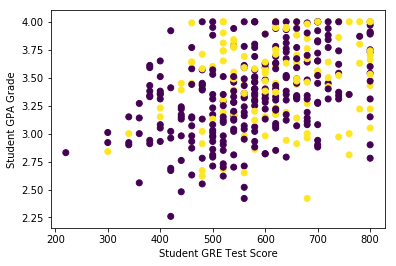

In [6]:
# To get the intiution about the situation. Lets visualize how the GRE and GPA impacts the admissions. 
plt.scatter(data.gre, data.gpa, c = data.admit)
plt.xlabel('Student GRE Test Score')
plt.ylabel('Student GPA Grade')

#### Observation: 
Looking at the above chart, there is no clear division between sepreates admitted vs. non-admitted. So lets take the rank into consideration. 
##### Question: 
How to assign specific colors to admitted vs. non admitted students? 

In [7]:
# Taking Rank into consideration. This involves filtering specific values of a feature. 
#So, How do you filter a value and create a subsets of dataframe based on the filter?

data_rank1 = data[data["rank"] == 1]
data_rank1.head(5)

,admit,gre,gpa,rank
2,1,800,4.00,1
6,1,560,2.98,1
11,0,440,3.22,1
12,1,760,4.00,1
14,1,700,4.00,1


Text(0, 0.5, 'Student GPA Grade')

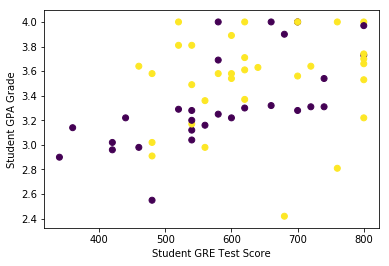

In [8]:
plt.scatter(data_rank1.gre, data_rank1.gpa, c = data_rank1.admit)
plt.xlabel('Student GRE Test Score')
plt.ylabel('Student GPA Grade')

In [9]:
data_rank3 = data[data["rank"] == 3]
data_rank3.head(5)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
8,1,540,3.39,3
15,0,480,3.44,3
17,0,360,2.56,3


Text(0, 0.5, 'Student GPA Grade')

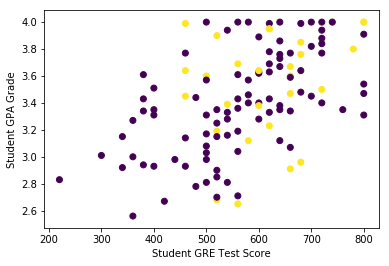

In [10]:
plt.scatter(data_rank3.gre, data_rank3.gpa, c = data_rank3.admit)
plt.xlabel('Student GRE Test Score')
plt.ylabel('Student GPA Grade')

# ONE HOT ENCODING

### Since the rank plays a important role in showing us relationship between admitted vs. non-admitted student. Lets one hot encode the rank variable

STEP 1: Concatenate pandas objects along a particular axis with optional set logic along the other axes

pandas.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)[source]

STEP 2: pandas.get_dummies(data, prefix=None, prefix_sep='', dummyna=False, columns=None, sparse=False, drop_first=False, dtype=None)

In [11]:
type(data_rank1)
type([data_rank1])

list

In [12]:
# Learning Concat 
contact_data_sets = pd.concat([data_rank1, data], axis=0)
contact_data_sets.head(3)

,admit,gre,gpa,rank
2,1,800,4.00,1
6,1,560,2.98,1
11,0,440,3.22,1


In [13]:
dummies = pd.get_dummies(data['rank'], prefix = 'wsj')
dummies.head()

,wsj_1,wsj_2,wsj_3,wsj_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [14]:
test = pd.concat([data, pd.get_dummies(data['rank'], prefix = 'rank')], axis=1)
test.head(5)

,admit,gre,gpa,rank,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0
3,1,640,3.19,4,0,0,0,1
4,0,520,2.93,4,0,0,0,1


In [15]:
test = test.drop('rank', axis=1)

In [16]:
test.head(5)

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1


# SCALING

In [17]:
# Making a copy of our data
processed_data = test
processed_data.head(5)

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1


In [18]:
processed_data['gre'] = processed_data['gre']/800
processed_data['gpa'] = processed_data['gpa']/4


In [19]:
processed_data.head()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.9025,0,0,1,0
1,1,0.825,0.9175,0,0,1,0
2,1,1.000,1.0000,1,0,0,0
3,1,0.800,0.7975,0,0,0,1
4,0,0.650,0.7325,0,0,0,1


## HOW TO SPLIT A DATAFRAME

In [27]:
processed_data.head(5)

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.9025,0,0,1,0
1,1,0.825,0.9175,0,0,1,0
2,1,1.000,1.0000,1,0,0,0
3,1,0.800,0.7975,0,0,0,1
4,0,0.650,0.7325,0,0,0,1


In [24]:
int(len(processed_data)*0.9)

360

## Splitting the data into Training and Testing

In [29]:
sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.9), replace=False)
sample

array([213, 357, 257, 195, 226, 388,  15,  24, 317, 137,   6,  28, 126,
        66, 361, 235, 102, 300, 172, 107,  56,  67, 162, 128, 283,  16,
        34,   7, 130, 330, 320, 231, 117, 151, 209,  95, 189,  68,  25,
       346, 321, 167,  36, 143, 349, 382, 399, 377, 156, 190,  94, 286,
       228, 131,  33,  26, 325, 203,  23, 179,  44,  38,  75, 164, 183,
        83, 284, 309, 258, 260,   9,  86,  80, 376,  58, 201,  87, 340,
       176, 293,  84, 105, 197, 139,  60, 191,  48, 175, 144, 356, 208,
       331,  78, 256, 149, 301, 250, 134, 249,  21, 205,  61, 304, 352,
        11, 119, 371,  98,  52, 233, 351, 383,  57,  63, 398, 193,  79,
       394, 316, 297, 308, 355, 373, 329, 269, 254, 140, 123,  40, 338,
       242,  72,  22, 389, 118, 275, 155,  53, 393, 318, 375, 158,  90,
       369, 290, 214,  32, 279, 359, 108, 225, 294, 147, 396, 273, 266,
       125, 100, 328, 111, 345, 358, 194,  64,   4, 299,  49,  27, 333,
       114, 165,   0, 248,  42, 109, 169, 390, 324, 218, 360, 39

In [30]:
train_data = processed_data.iloc[sample]

In [33]:
train_data.head(10)

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
213,0,0.800,0.8450,0,0,1,0
357,0,0.900,0.8275,1,0,0,0
257,1,0.775,0.9875,0,0,1,0
195,0,0.700,0.8975,0,1,0,0
226,0,0.775,0.8950,0,1,0,0
388,0,0.800,0.7925,0,1,0,0
15,0,0.600,0.8600,0,0,1,0
24,1,0.950,0.8375,0,1,0,0
317,1,0.975,0.9075,0,0,0,1
137,0,0.875,1.0000,0,0,1,0


In [31]:
test_data = processed_data.drop(sample)

In [34]:
test_data.head(10)

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
12,1,0.950,1.0000,1,0,0,0
20,0,0.625,0.7925,0,0,1,0
31,0,0.950,0.8375,0,0,1,0
35,0,0.500,0.7625,0,1,0,0
41,1,0.725,0.8300,0,1,0,0
50,0,0.800,0.9650,0,0,1,0
55,1,0.925,1.0000,0,0,1,0
69,0,1.000,0.9325,1,0,0,0
70,0,0.800,1.0000,0,0,1,0
71,0,0.375,0.7300,0,0,0,1
